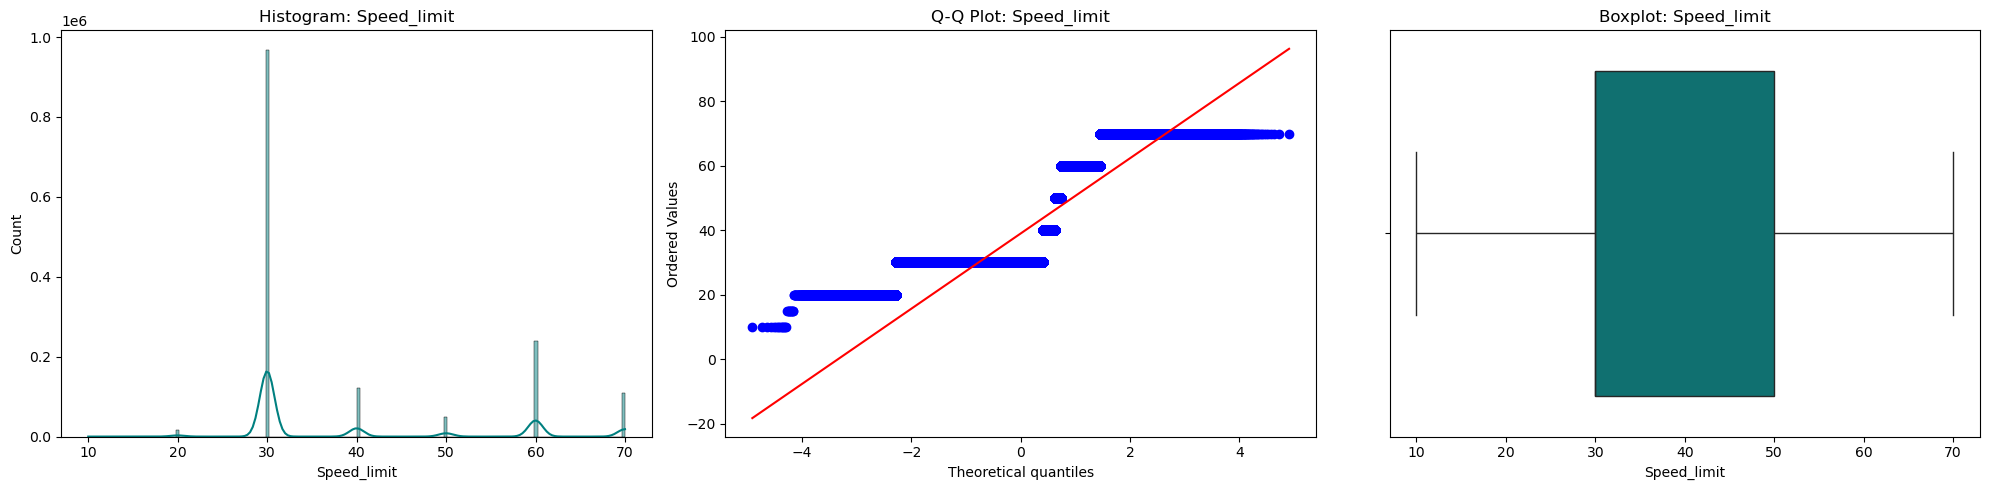

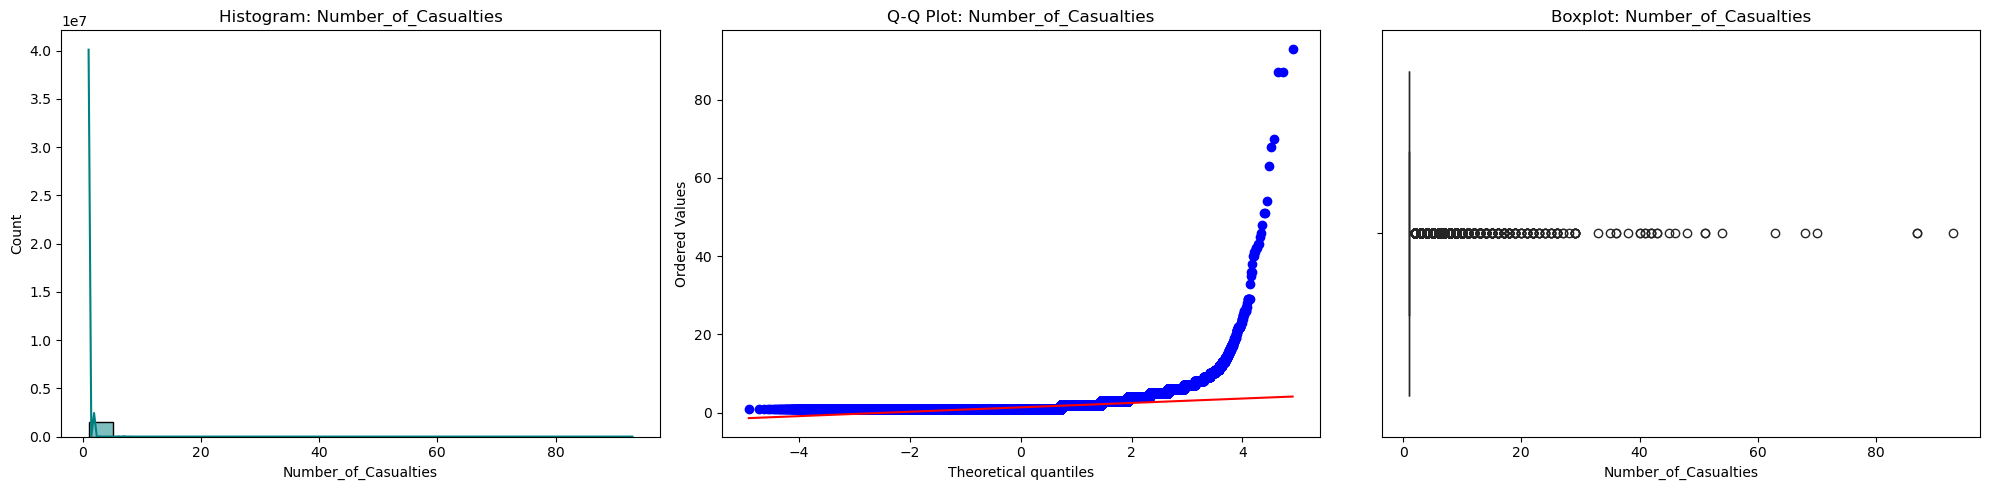

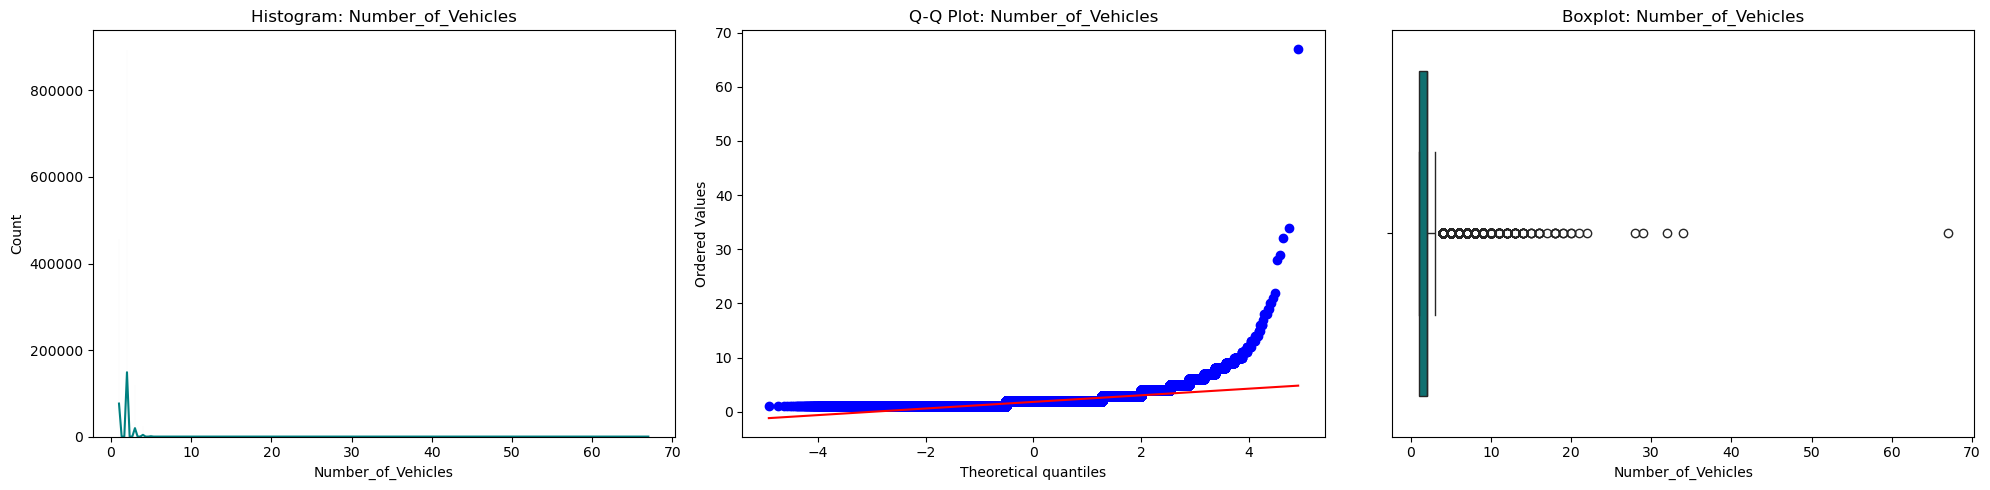

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("UK_Accident.csv")
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Hour'] = df['Time'].dt.hour

def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)
    plt.subplot(1, 3, 1)
    sns.histplot(data[col], kde=True, color='teal')
    plt.title(f'Histogram: {col}')
    plt.subplot(1, 3, 2)
    stats.probplot(data[col].dropna(), dist='norm', plot=plt)
    plt.title(f'Q-Q Plot: {col}')
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[col], color='teal')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

dist_lst = ['Speed_limit', 'Number_of_Casualties', 'Number_of_Vehicles']
for col in dist_lst:
    diagnostic_plot(df, col)


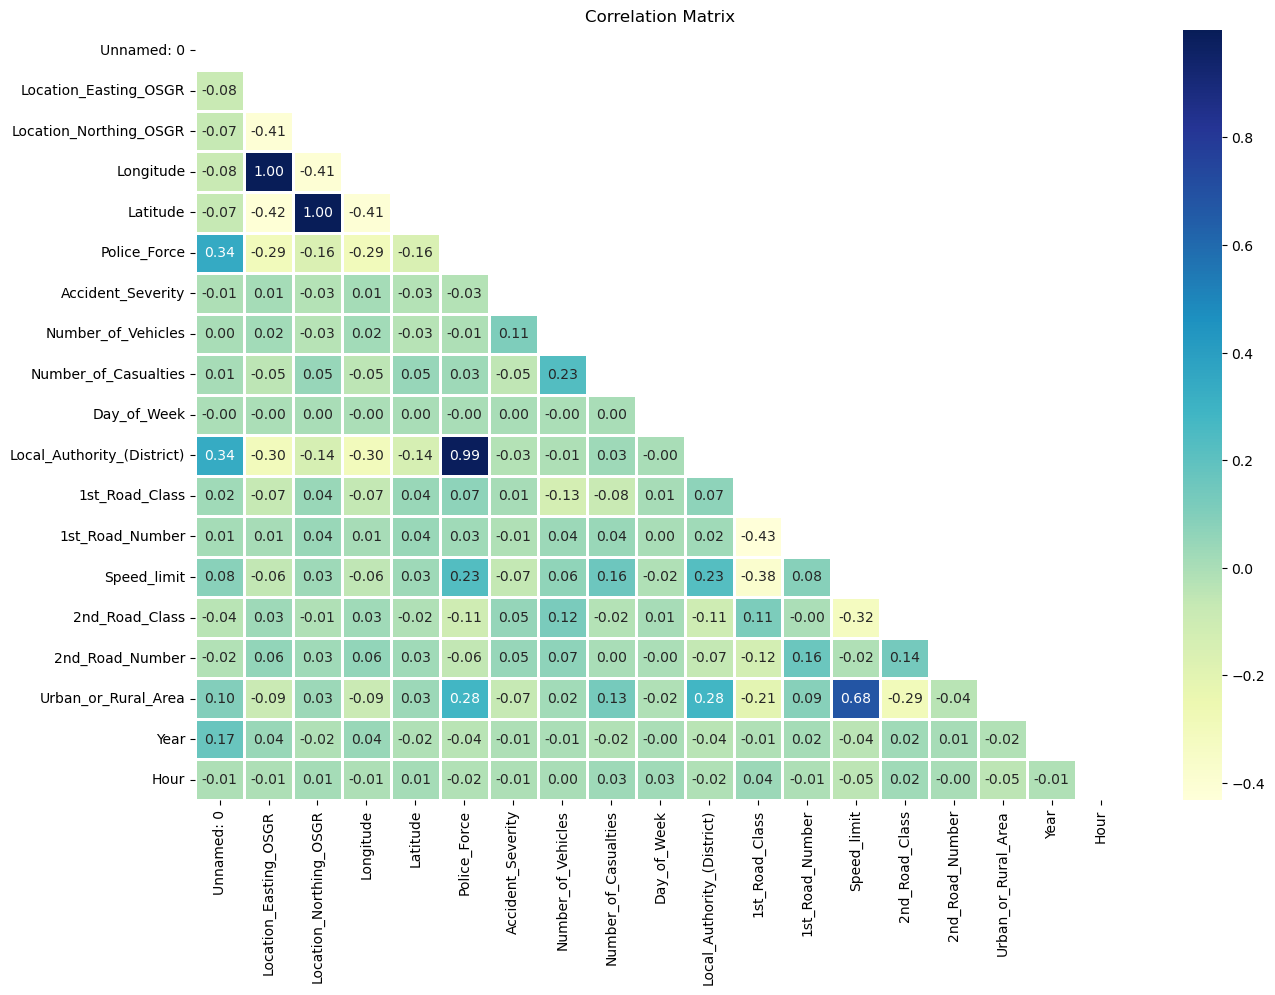

In [9]:
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number])  # select only numeric columns
corr = numeric_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


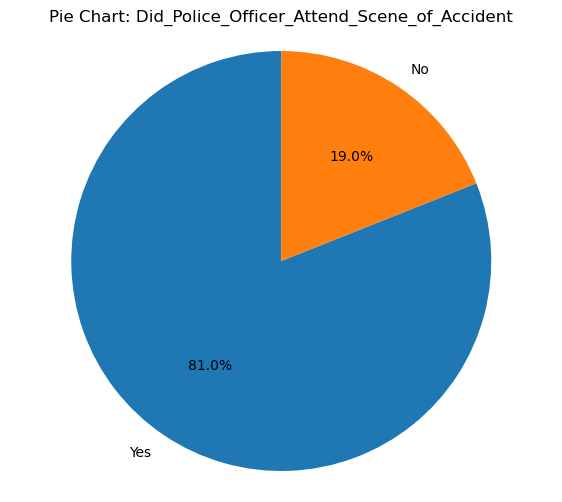

In [11]:
def pie_chart(data, col):
    x = data[col].value_counts()
    labels = x.index
    plt.figure(figsize=(7, 6))
    plt.pie(x, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.6)
    plt.axis('equal')
    plt.title(f'Pie Chart: {col}')
    plt.show()

pie_chart(df, 'Did_Police_Officer_Attend_Scene_of_Accident')

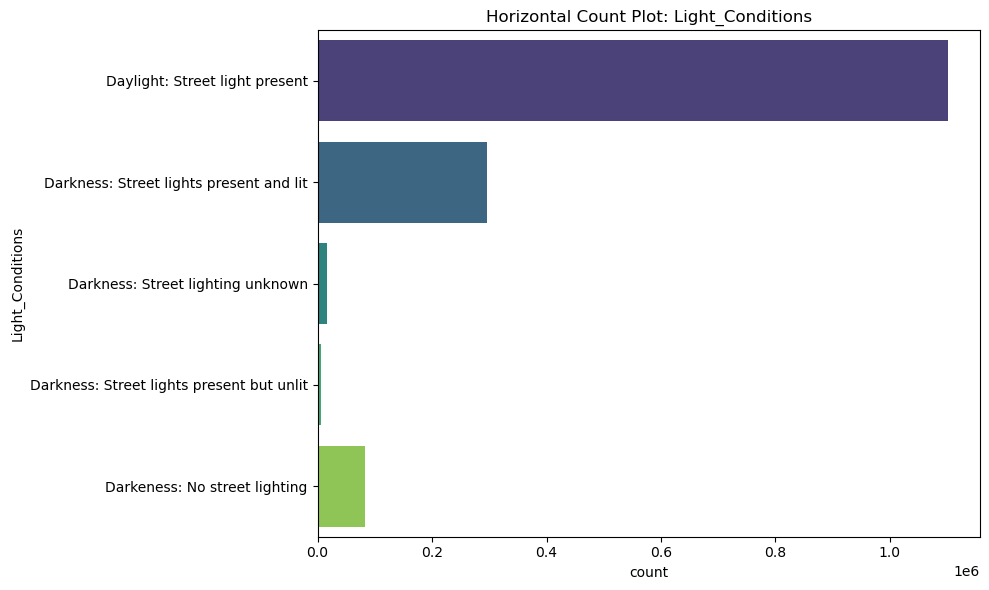

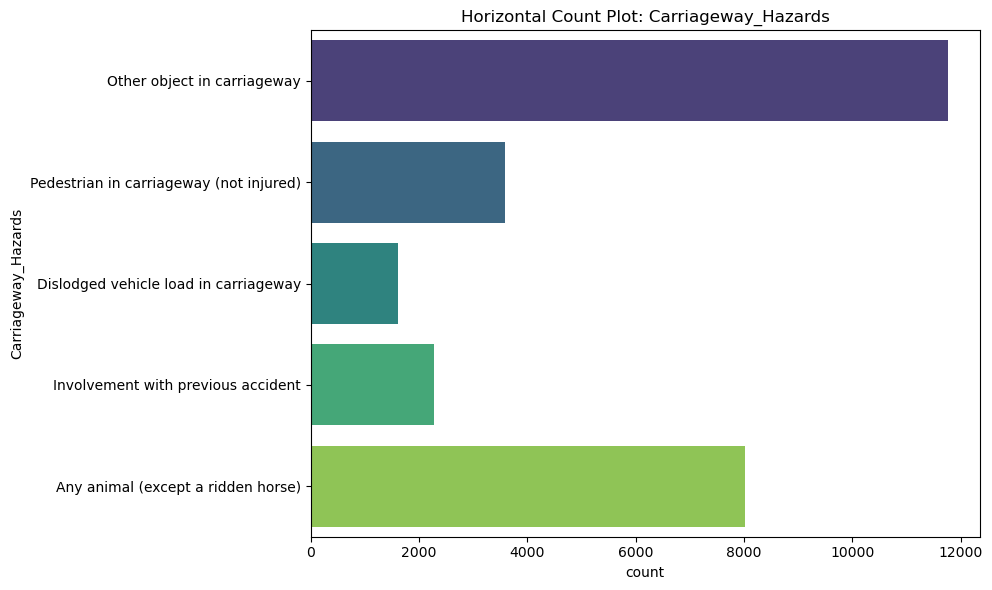

In [17]:
def count_plot_horizontal(data, col):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, hue=col, legend=False, palette='viridis')
    plt.title(f'Horizontal Count Plot: {col}')
    plt.tight_layout()
    plt.show()
cols_horizontal = ['Light_Conditions', 'Carriageway_Hazards']
for col in cols_horizontal:
    count_plot_horizontal(df, col)




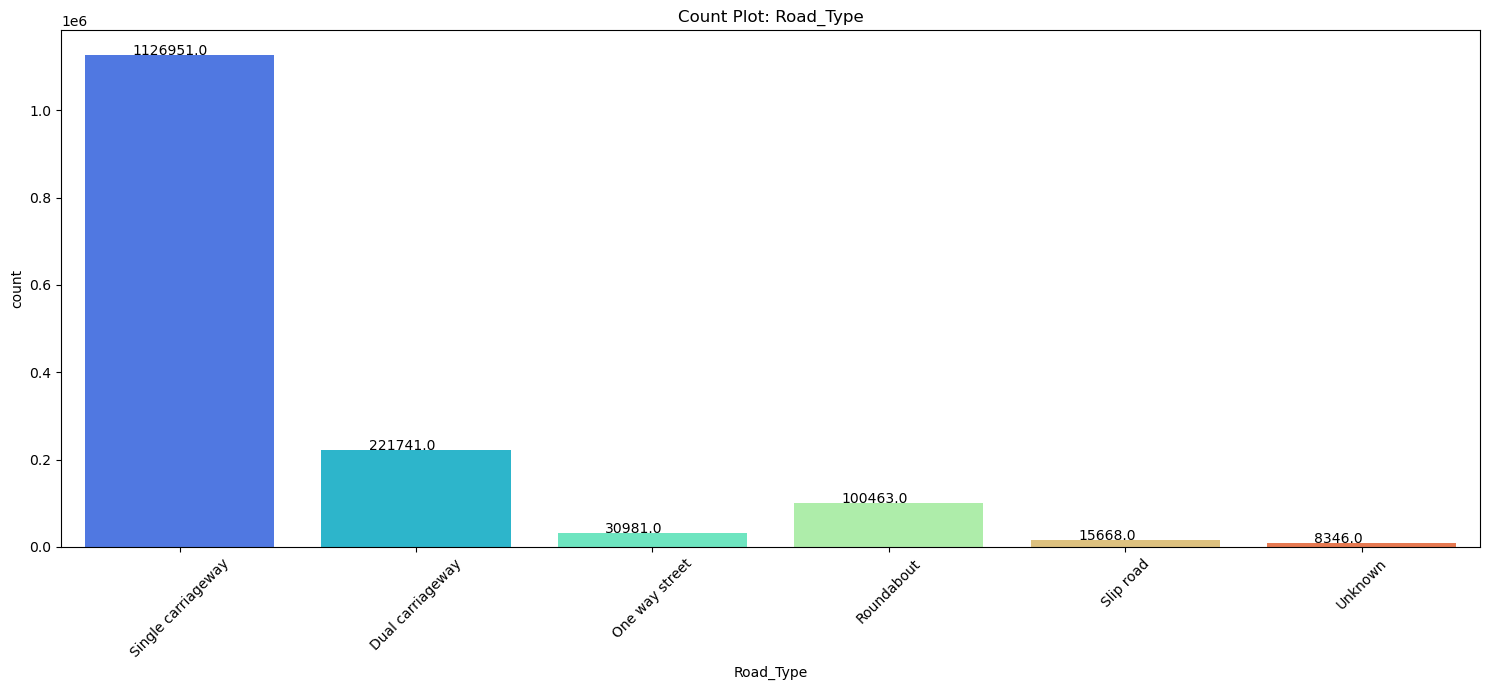

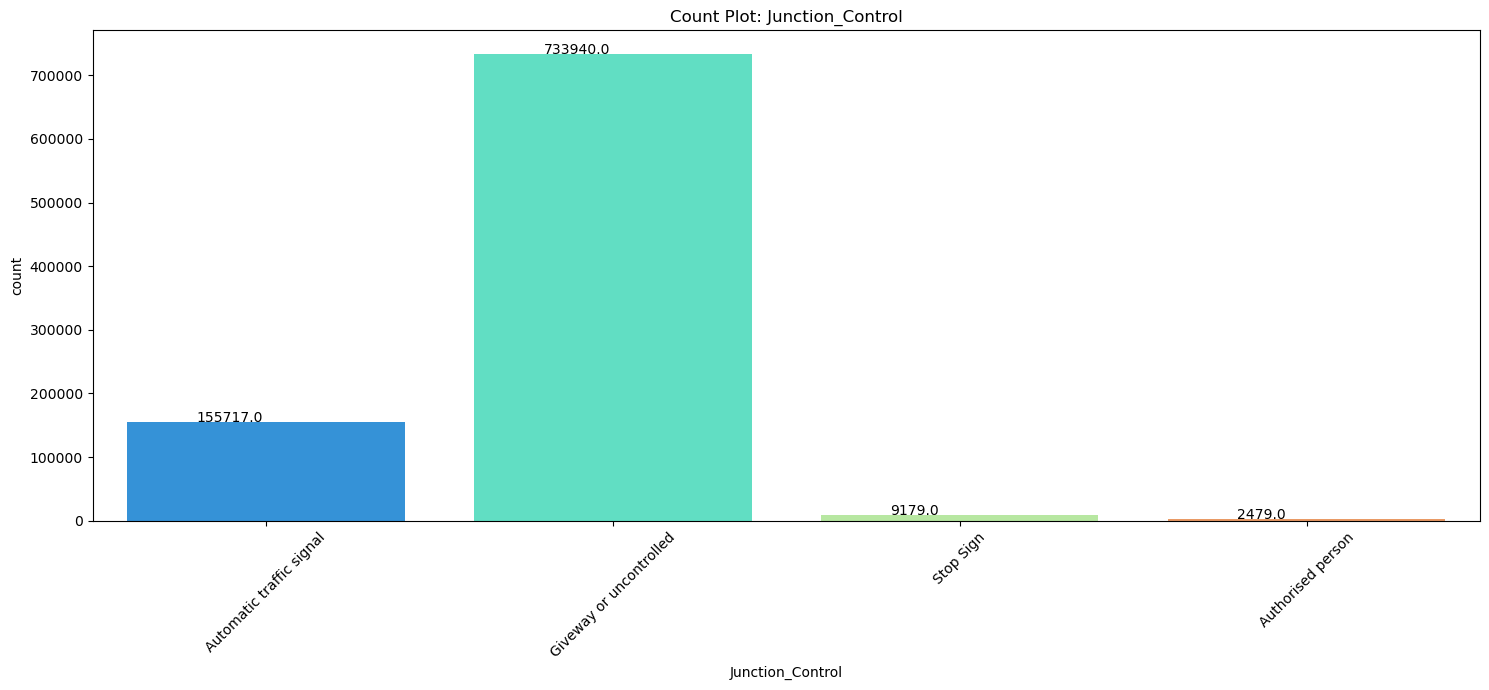

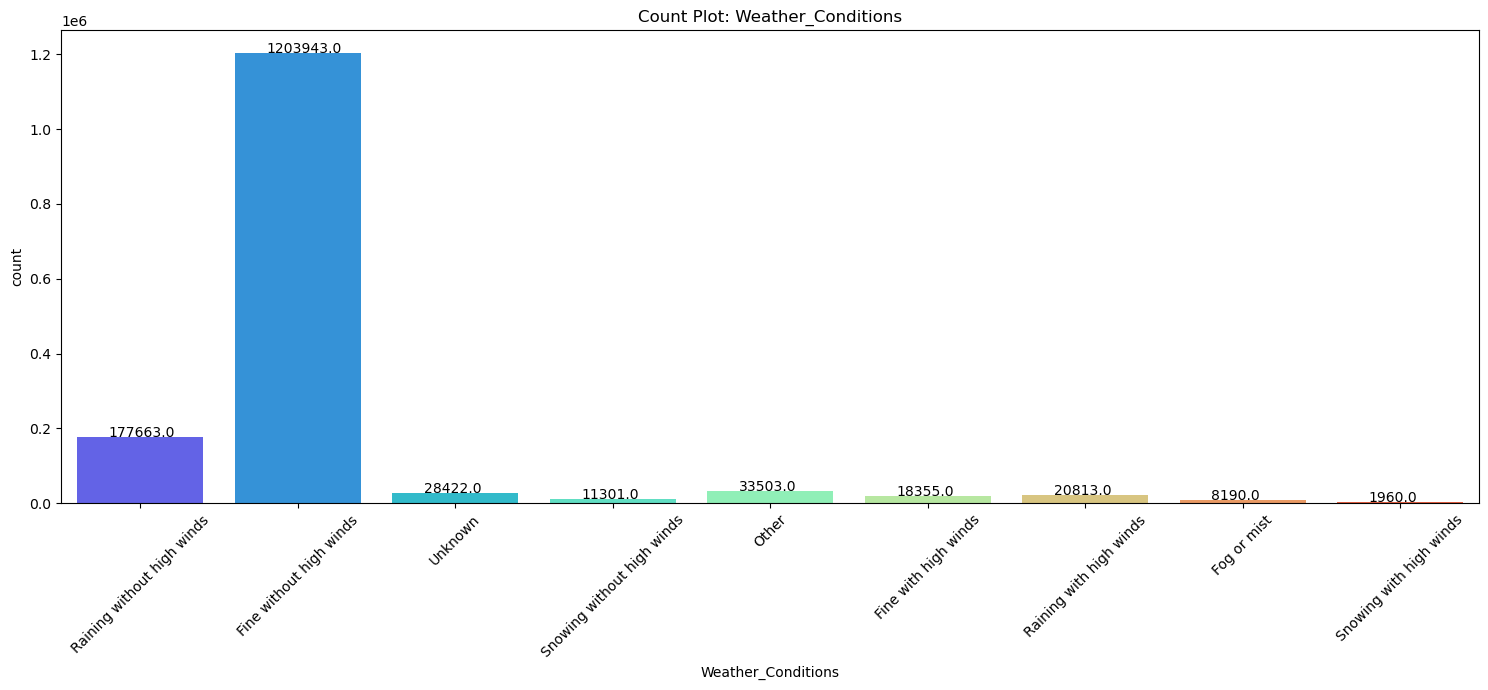

In [19]:
def count_plot_vertical(data, col):
    plt.figure(figsize=(15, 7))
    ax = sns.countplot(x=col, data=data, hue=col, legend=False, palette='rainbow')
    ax.set_title(f'Count Plot: {col}')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() + 0.2, p.get_height() + 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

cols_vertical = ['Road_Type', 'Junction_Control', 'Weather_Conditions']
for col in cols_vertical:
    count_plot_vertical(df, col)
